## CIFAR 10

In [43]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [44]:
from fastai.conv_learner import *
PATH = "data/cifar10/"
os.makedirs(PATH,exist_ok=True)

### Downloading CIFAR 10

In [3]:
from fastai import io

In [4]:
import tarfile

In [5]:
def untar_file(file_path, save_path):
    if file_path.endswith('.tar.gz') or file_path.endswith('.tgz'):
        obj = tarfile.open(file_path)
        obj.extractall(save_path)
        obj.close()
        os.remove(file_path)

In [6]:
cifar_url = 'http://files.fast.ai/data/cifar10.tgz' # faster download
# cifar_url = 'http://pjreddie.com/media/files/cifar.tgz'

io.get_data(cifar_url, 'data/cifar10.tgz')
untar_file('data/cifar10.tgz', 'data/')

cifar10.tgz: 168MB [00:34, 4.81MB/s]                            


### Load classes

In [13]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [14]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [15]:
bs=128

### Look at data

In [ ]:
data = get_data(32,4)

In [ ]:
x,y=next(iter(data.trn_dl))

In [ ]:
plt.imshow(data.trn_ds.denorm(x)[0]);

In [ ]:
plt.imshow(data.trn_ds.denorm(x)[1]);

## Initial model

In [45]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.half().cuda(), name='cifar10_rn29_8_64')

In [46]:
data = get_data(8,bs*4*4)

In [47]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [48]:
lr=5e-2; wd=5e-4

In [10]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      4.894699   1707135951962112.0 0.097656  



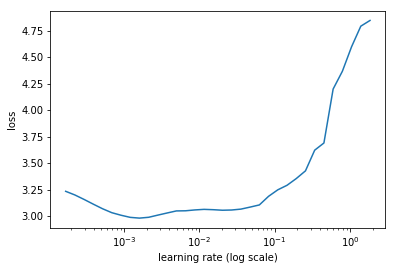

In [11]:
learn.sched.plot()

In [34]:
%pdb off

Automatic pdb calling has been turned OFF


In [51]:
torch.HalfTensor(1).float()


1.00000e-04 *
  2.2984
[torch.FloatTensor of size 1]

In [49]:
%time learn.fit(lr, 1, cycle_len=1, use_clr=(20,8))

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/25 [00:00<?, ?it/s]


Exception in thread Thread-9:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



AttributeError: 'torch.HalfTensor' object has no attribute 'numpy'

In [15]:
%time learn.fit(lr, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      2.039399   1.859117   0.323658  
    1      2.006226   1.780103   0.351579                 

CPU times: user 53.9 s, sys: 30.3 s, total: 1min 24s
Wall time: 1min


[1.780103, 0.35157891511917116]

In [16]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.753172   1.627124   0.402835  
    1      1.691856   1.5169     0.451104                 
 56%|█████▌    | 14/25 [00:15<00:12,  1.11s/it, loss=1.63]

KeyboardInterrupt: 

In [ ]:
learn.sched.plot_lr()

In [ ]:
learn.save('8x8_8')

## 16x16

In [ ]:
learn.load('8x8_8')

In [ ]:
learn.set_data(get_data(16,bs*2))

In [ ]:
%time learn.fit(1e-3, 1, wds=wd)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.sched.plot()

In [ ]:
lr=1e-2

In [ ]:
%time learn.fit(lr, 2, cycle_len=1, wds=wd)

In [ ]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [ ]:
learn.save('16x16_8')

## 24x24

In [ ]:
learn.load('16x16_8')

In [ ]:
learn.set_data(get_data(24,bs))

In [ ]:
%time learn.fit(1e-2, 1, wds=wd)

In [ ]:
learn.unfreeze()

In [ ]:
%time learn.fit(lr, 1, cycle_len=1, wds=wd)

In [ ]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [ ]:
learn.save('24x24_8')

In [ ]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)metrics.log_loss(y,preds), accuracy(preds,y)

## 32x32

In [ ]:
learn.load('24x24_8')

In [ ]:
learn.set_data(get_data(32,bs))

In [ ]:
%time learn.fit(1e-2, 1, wds=wd)

In [ ]:
learn.unfreeze()

In [ ]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [ ]:
%time learn.fit(lr, 3, cycle_len=4, wds=wd)

In [ ]:
log_preds,y = learn.TTA()
metrics.log_loss(y,np.exp(log_preds)), accuracy(log_preds,y)

In [ ]:
learn.save('32x32_8')